# Data Extraction:

In [86]:
#Importing required libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows',None)

In [ ]:
pip install mysql-connector-python pandas matplotlib seaborn numpy

# Connecting to MySql:

In [88]:
db=mysql.connector.connect(host="localhost",user="root",password="root@123",database="customer_purchase_analysis")
mycursor=db.cursor()
print(db)

In [89]:
# Checking conection-
mycursor.execute("Select * from Customers")
output=mycursor.fetchall()
for x in output:
    print(x) 

(1, 'Aaron Arnold Jr.')
(2, 'Aaron Jennings')
(3, 'Aaron Miles')
(4, 'Aaron Rubio')
(5, 'Abigail Davis')
(6, 'Adam Craig')
(7, 'Adam Crawford')
(8, 'Adam Davis')
(9, 'Adam Jordan')
(10, 'Adam Rodriguez')
(11, 'Adrian Patterson')
(12, 'Albert Edwards')
(13, 'Alejandro Martinez')
(14, 'Alex Stewart')
(15, 'Alexander Williams')
(16, 'Alexandra Gibson')
(17, 'Alexis Chen')
(18, 'Alexis Morgan')
(19, 'Alexis Nelson')
(20, 'Alexis Tran')
(21, 'Alexis Yang')
(22, 'Alicia Li')
(23, 'Alicia Ray')
(24, 'Allison Black')
(25, 'Alyssa Cochran')
(26, 'Alyssa Rojas')
(27, 'Alyssa Thomas')
(28, 'Alyssa Thompson')
(29, 'Amanda Dorsey')
(30, 'Amanda Guzman')
(31, 'Amanda Harvey')
(32, 'Amanda Huff')
(33, 'Amanda Sharp')
(34, 'Amber Alvarez')
(35, 'Amber Butler')
(36, 'Amber Martin')
(37, 'Amy Black')
(38, 'Amy Cervantes')
(39, 'Amy Meyer')
(40, 'Amy Villarreal')
(41, 'Andrea Parks')
(42, 'Andrea Turner')
(43, 'Andres May')
(44, 'Andrew Brown')
(45, 'Andrew Esparza')
(46, 'Andrew Kelly')
(47, 'Andrew Log

# Converting Mysql Data to Data Frame:

In [90]:
from sqlalchemy import create_engine
user = 'root'
password = 'root@123'
host = 'localhost'
port = 3306
database = 'customer_purchase_analysis'

def get_connection():
	return create_engine(
		url="mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(
			user, password, host, port, database
		)
	)


if __name__ == '__main__':

	try:
		engine = get_connection()
		print(
			f"Connection to the {host} for user {user} created successfully.")
	except Exception as ex:
		print("Connection could not be made due to the following error: \n", ex)

Connection to the localhost for user root created successfully.


In [91]:
import sqlalchemy

In [92]:
dialect = "mysql"
driver = "pymysql"
login = "root"
password = "root@123"
host = "localhost"     
db_name = "customer_purchase_analysis"
my_sql_query = "SELECT * FROM customers"

In [93]:
import pandas as pd
import sqlalchemy
import urllib.parse

dialect = "mysql"
driver = "pymysql"
username = "root"
password = urllib.parse.quote_plus("root@123")  # URL encode the password
host = "localhost"
db_name = "customer_purchase_analysis"
my_sql_query = "SELECT * FROM customers"

db_uri = f"{dialect}+{driver}://{username}:{password}@{host}/{db_name}"
my_engine = sqlalchemy.create_engine(db_uri)

with my_engine.connect() as my_connection:
    customers = pd.read_sql_query(sql=my_sql_query, con=my_connection)
print(customers.head())

   CustomerID      CustomerName
0           1  Aaron Arnold Jr.
1           2    Aaron Jennings
2           3       Aaron Miles
3           4       Aaron Rubio
4           5     Abigail Davis


In [94]:
my_sql_query = "SELECT * FROM products"

with my_engine.connect() as my_connection:
    products = pd.read_sql_query(sql=my_sql_query, con=my_connection)
print(products.head())

   ProductID      ProductName
0       1001  Air Conditioner
1       1002          Blender
2       1003           Camera
3       1004     Coffee Maker
4       1005  Electric Kettle


In [95]:
my_sql_query = "SELECT * FROM categories"

with my_engine.connect() as my_connection:
    categories = pd.read_sql_query(sql=my_sql_query, con=my_connection)
print(categories.head())

   CategoryID     CategoryName
0        5001      Electronics
1        5002  Home Appliances


In [96]:
my_sql_query = "SELECT * FROM transactions"

with my_engine.connect() as my_connection:
    transactions = pd.read_sql_query(sql=my_sql_query, con=my_connection)
print(transactions.head())

   TransactionID  CustomerID  ProductID  CategoryID  PurchaseQuantity  \
0              1         542       1012        5001                 5   
1              2         473       1003        5001                 4   
2              3         968       1005        5002                 3   
3              4         199       1015        5001                 5   
4              5         840       1018        5002                 4   

   PurchasePrice PurchaseDate                      Country  
0         689.99   2024-03-01                     Barbados  
1          79.27   2024-01-26     Northern Mariana Islands  
2         666.75   2024-05-13       British Virgin Islands  
3         316.19   2023-09-21                    Guatemala  
4         700.24   2024-01-25  Falkland Islands (Malvinas)  


# Exploratory Data analysis:

In [97]:
#Basic data type check
customers.dtypes

CustomerID       int64
CustomerName    object
dtype: object

In [98]:
products.dtypes

ProductID       int64
ProductName    object
dtype: object

In [99]:
categories.dtypes

CategoryID       int64
CategoryName    object
dtype: object

In [100]:
transactions.dtypes

TransactionID         int64
CustomerID            int64
ProductID             int64
CategoryID            int64
PurchaseQuantity      int64
PurchasePrice       float64
PurchaseDate         object
Country              object
dtype: object

In [101]:
# Finding the number of rows and columns
a = customers.shape
print("The dataset has",a[0],"rows and",a[1],"columns")

The dataset has 993 rows and 2 columns


In [102]:
a = products.shape
print("The dataset has",a[0],"rows and",a[1],"columns")

The dataset has 20 rows and 2 columns


In [103]:
a = categories.shape
print("The dataset has",a[0],"rows and",a[1],"columns")

The dataset has 2 rows and 2 columns


In [104]:
a = transactions.shape
print("The dataset has",a[0],"rows and",a[1],"columns")

The dataset has 1000 rows and 8 columns


In [105]:
# Checking nulls :
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
dtype: int64


In [106]:
print(products.isnull().sum())

ProductID      0
ProductName    0
dtype: int64


In [107]:
print(categories.isnull().sum())

CategoryID      0
CategoryName    0
dtype: int64


In [108]:
print(transactions.isnull().sum())

TransactionID       0
CustomerID          0
ProductID           0
CategoryID          0
PurchaseQuantity    0
PurchasePrice       0
PurchaseDate        0
Country             0
dtype: int64


In [109]:
# Merging the datasets to get the full dataset, this will help to create graphs and analuze data
newdf = transactions.merge(customers, how='inner',on="CustomerID")

In [110]:
newdf1=newdf.merge(products, how='inner',on="ProductID")

In [111]:
final_data=newdf1.merge(categories, how='inner',on="CategoryID")

In [112]:
# Changing the date column to date-
final_data['PurchaseDate']= pd.to_datetime(final_data['PurchaseDate'])

In [113]:
# Checking the conversion
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TransactionID     1000 non-null   int64         
 1   CustomerID        1000 non-null   int64         
 2   ProductID         1000 non-null   int64         
 3   CategoryID        1000 non-null   int64         
 4   PurchaseQuantity  1000 non-null   int64         
 5   PurchasePrice     1000 non-null   float64       
 6   PurchaseDate      1000 non-null   datetime64[ns]
 7   Country           1000 non-null   object        
 8   CustomerName      1000 non-null   object        
 9   ProductName       1000 non-null   object        
 10  CategoryName      1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 86.1+ KB


# Analysis:

In [117]:
# How many transactions are there-
len(final_data["TransactionID"])

1000

In [116]:
# What is the total revenue
total_revenue = final_data["PurchasePrice"].sum()
print(total_revenue)

489274.72


In [114]:
# What is the average purchase price
average_purchase_price = round(final_data["PurchasePrice"].mean(), 2)
print(average_purchase_price)

489.27


In [78]:
# Category wise total quantity sold:
final_data.groupby(['CategoryName'], sort=True)['PurchaseQuantity'].sum()

CategoryName
Electronics        1480
Home Appliances    1573
Name: PurchaseQuantity, dtype: int64

In [79]:
# Category wise total revenue
final_data.groupby(['CategoryName'], sort=True)['PurchasePrice'].sum()

CategoryName
Electronics        248194.56
Home Appliances    241080.16
Name: PurchasePrice, dtype: float64

In [80]:
# Product wise total quantity:

new_df = final_data.groupby(['ProductName'], sort=True)['PurchaseQuantity'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchaseQuantity', ascending=False)
new_df.rename(columns={'PurchaseQuantity':'TotalQuantity'},inplace= True)
new_df

,ProductName,TotalQuantity
17,Toaster,191
6,Heater,183
8,Microwave,180
10,Refrigerator,167
0,Air Conditioner,165
9,Printer,163
16,Television,161
14,Smartwatch,159
7,Laptop,154
12,Smart Bulb,152


In [81]:
# Product wise total revenue:
new_df = final_data.groupby(['ProductName'], sort=True)['PurchasePrice'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchasePrice', ascending=False)
print(new_df)

        ProductName  PurchasePrice
8         Microwave       30970.75
14       Smartwatch       29407.68
17          Toaster       29116.03
6            Heater       28828.67
5        Headphones       27748.78
10     Refrigerator       27730.95
9           Printer       27360.29
16       Television       25188.60
2            Camera       24985.70
0   Air Conditioner       24812.05
7            Laptop       24493.14
12       Smart Bulb       22575.66
4   Electric Kettle       22566.28
13       Smartphone       22508.32
15           Tablet       22028.51
18   Vacuum Cleaner       21921.68
11           Router       21897.88
19  Washing Machine       19987.46
3      Coffee Maker       19517.16
1           Blender       15629.13


In [124]:
# Top 10 countries by revenue:
final_data.groupby(['Country'])['PurchasePrice'].sum().nlargest(10)

Country
Palau                          5584.26
Sudan                          5496.35
Guyana                         5410.66
Bhutan                         5317.89
Romania                        4944.19
Luxembourg                     4866.90
Barbados                       4824.66
Falkland Islands (Malvinas)    4482.61
Korea                          4479.61
Saint Lucia                    4324.02
Name: PurchasePrice, dtype: float64

In [123]:
# Top 10 customers in terms of Total spent
final_data.groupby(['CustomerName'])['PurchasePrice'].sum().nlargest(5)

CustomerName
Brittany Miller      1324.45
Charles Hernandez    1289.25
James Miller         1080.46
Christopher Hill     1034.04
Jillian Baker         999.98
Name: PurchasePrice, dtype: float64

In [128]:
final_data.groupby(['CustomerName','ProductName','CategoryName'])['PurchasePrice'].sum().nlargest(10)

CustomerName      ProductName     CategoryName   
Jillian Baker     Vacuum Cleaner  Home Appliances    999.98
Patricia Taylor   Smartphone      Electronics        999.44
Mikayla Rios      Camera          Electronics        998.17
Matthew Espinoza  Television      Electronics        997.45
Jamie Montoya     Headphones      Electronics        996.01
Charles Clark     Smartphone      Electronics        995.97
Antonio Hughes    Vacuum Cleaner  Home Appliances    994.58
Carlos Smith      Headphones      Electronics        993.55
Steven Rivera     Refrigerator    Home Appliances    992.33
Casey Johnson     Television      Electronics        991.08
Name: PurchasePrice, dtype: float64

In [125]:
# Top 10 products by Quantity:
final_data.groupby(['ProductName'])['PurchaseQuantity'].sum().nlargest(10)

ProductName
Toaster            191
Heater             183
Microwave          180
Refrigerator       167
Air Conditioner    165
Printer            163
Television         161
Smartwatch         159
Laptop             154
Smart Bulb         152
Name: PurchaseQuantity, dtype: int64

In [133]:
# What is the total quantity sold:
Total_quantity = final_data["PurchaseQuantity"].sum()
print(Total_quantity)

3053


In [134]:
# Year wise number of customers:
new_df = final_data.groupby([final_data.PurchaseDate.dt.year], sort=True)['CustomerID'].count().reset_index()
new_df = new_df.sort_values(by = 'CustomerID', ascending=False)
new_df.rename(columns={'CustomerID':'Customer_Count'},inplace= True)
new_df['Percentage']=(new_df['Customer_Count'] /
                  new_df['Customer_Count'].sum()) * 100
new_df

,PurchaseDate,Customer_Count,Percentage
0,2023,543,54.3
1,2024,457,45.7


In [120]:
# Year wise revenue:
new_df = final_data.groupby([final_data.PurchaseDate.dt.year], sort=True)['PurchasePrice'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchasePrice', ascending=False)
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
new_df.rename(columns={'PurchaseDate':'Year'},inplace= True)
new_df['Growth_Rate'] = new_df['Total_Revenue'].pct_change(periods=1) * 100
new_df

,Year,Total_Revenue,Growth_Rate
0,2023,262346.07,NaN
1,2024,226928.65,-13.500267


In [121]:
# Month wise revenue:
new_df = final_data.groupby([final_data.PurchaseDate.dt.month ], sort=True)['PurchasePrice'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchasePrice', ascending=False)
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
new_df.rename(columns={'PurchaseDate':'Month'},inplace= True)
new_df

,Month,Total_Revenue
11,12,51910.42
6,7,47956.69
8,9,46764.80
0,1,43575.14
4,5,42799.97
1,2,41393.77
10,11,39839.29
9,10,38368.97
2,3,37442.66
3,4,34165.64


In [122]:
# Quarter wise revenue
new_df = final_data.groupby([final_data.PurchaseDate.dt.quarter ], sort=True)['PurchasePrice'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchasePrice', ascending=False)
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
new_df.rename(columns={'PurchaseDate':'Quarter'},inplace= True)
new_df

,Quarter,Total_Revenue
3,4,130118.68
2,3,128214.95
0,1,122411.57
1,2,108529.52


In [135]:
# Creating a copy of the original data and extracting year,month and quarter of purchase date into new columns
final_data_copy=final_data
final_data_copy['Year']=final_data_copy['PurchaseDate'].dt.year
final_data_copy['Month']=final_data_copy['PurchaseDate'].dt.month
final_data_copy['Quarter']=final_data_copy['PurchaseDate'].dt.quarter

In [136]:
# Year wise month wise revenue with growth
new_df = final_data_copy.groupby(['Year','Month'], sort=True)['PurchasePrice'].sum().reset_index()
#new_df = new_df.sort_values(by = 'Purchase_Price', ascending=False)
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
new_df['Growth_Rate'] = new_df['Total_Revenue'].pct_change(periods=1) * 100
new_df

,Year,Month,Total_Revenue,Growth_Rate
0,2023,6,4012.44,NaN
1,2023,7,47956.69,1095.200177
2,2023,8,33493.46,-30.158941
3,2023,9,46764.80,39.623676
4,2023,10,38368.97,-17.953311
5,2023,11,39839.29,3.832055
6,2023,12,51910.42,30.299561
7,2024,1,43575.14,-16.057046
8,2024,2,41393.77,-5.005997
9,2024,3,37442.66,-9.545180


In [138]:
#Year wise quarter wise total revenue:
new_df = final_data_copy.groupby(['Year','Quarter'], sort=True)['PurchasePrice'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchasePrice', ascending=False)
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)

new_df

,Year,Quarter,Total_Revenue
2,2023,4,130118.68
1,2023,3,128214.95
3,2024,1,122411.57
4,2024,2,104517.08
0,2023,2,4012.44


In [139]:
# Year wise month wise revenue 
new_df = final_data_copy.groupby(['Year','Month'], sort=True)['PurchasePrice'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchasePrice', ascending=False)
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
new_df

,Year,Month,Total_Revenue
6,2023,12,51910.42
1,2023,7,47956.69
3,2023,9,46764.80
7,2024,1,43575.14
11,2024,5,42799.97
8,2024,2,41393.77
5,2023,11,39839.29
4,2023,10,38368.97
9,2024,3,37442.66
10,2024,4,34165.64


In [140]:
# Year wise quarter wise growth:
#Year wise quarter wise total revenue:
new_df = final_data_copy.groupby(['Year','Quarter'], sort=True)['PurchasePrice'].sum().reset_index()
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
new_df['Growth_Rate'] = new_df['Total_Revenue'].pct_change(periods=1) * 100
new_df

,Year,Quarter,Total_Revenue,Growth_Rate
0,2023,2,4012.44,NaN
1,2023,3,128214.95,3095.435944
2,2023,4,130118.68,1.484796
3,2024,1,122411.57,-5.923139
4,2024,2,104517.08,-14.618300


In [147]:
# Year wise total quantity:
# Year wise revenue:
new_df = final_data.groupby([final_data.PurchaseDate.dt.year], sort=True)['PurchaseQuantity'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchaseQuantity', ascending=False)
new_df.rename(columns={'PurchaseDate':'Year'},inplace= True)
new_df

,Year,PurchaseQuantity
0,2023,1651
1,2024,1402


In [148]:
# Year wise month wise total quantity:
new_df = final_data_copy.groupby(['Year','Month'], sort=True)['PurchaseQuantity'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchaseQuantity', ascending=False)
new_df

,Year,Month,PurchaseQuantity
6,2023,12,295
5,2023,11,293
7,2024,1,292
3,2023,9,287
8,2024,2,272
1,2023,7,269
11,2024,5,268
4,2023,10,243
2,2023,8,236
9,2024,3,208


In [149]:
# Year wise quarter wise total quantity:
new_df = final_data_copy.groupby(['Year','Quarter'], sort=True)['PurchaseQuantity'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchaseQuantity', ascending=False)
new_df

,Year,Quarter,PurchaseQuantity
2,2023,4,831
1,2023,3,792
3,2024,1,772
4,2024,2,630
0,2023,2,28


In [150]:
# Country wise customer count-
# Year wise number of customers:
new_df = final_data.groupby(["Country"], sort=True)['CustomerID'].count().reset_index()
new_df = new_df.sort_values(by = 'CustomerID', ascending=False)
new_df.rename(columns={'CustomerID':'Customer_Count'},inplace= True)
new_df

,Country,Customer_Count
200,Sudan,11
162,Palau,10
166,Philippines,9
173,Romania,9
26,Botswana,9
199,Sri Lanka,9
111,Korea,8
144,Mozambique,8
122,Luxembourg,8
23,Bhutan,8


# Plots:

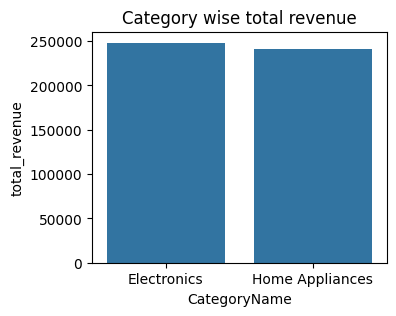

In [170]:
# Category wise total revenue
df = final_data.groupby(['CategoryName']).agg(total_revenue=("PurchasePrice", 'sum')) 
df = df.reset_index() 
colors = sns.color_palette('viridis', len(df))
plt.figure(figsize=(3.8, 3))
df
  
# plot barplot 
ax=sns.barplot(x="CategoryName", 
           y="total_revenue", 
           data=df,).set(title='Category wise total revenue')
y=list(df['total_revenue'])
plt.show()

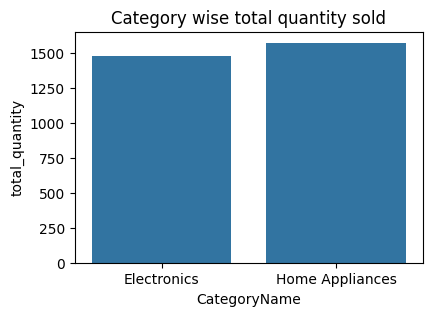

In [172]:
df = final_data.groupby(['CategoryName']).agg(total_quantity=("PurchaseQuantity", 'sum')) 
df = df.reset_index() 
plt.figure(figsize=(4.5, 3))
colors = sns.color_palette('viridis', len(df))
df
  
# plot barplot 
ax=sns.barplot(x="CategoryName", 
           y="total_quantity", 
           data=df).set(title='Category wise total quantity sold')
y=list(df['total_quantity'])

[Text(0.5, 1.0, 'Top 5 products with highest revenue')]

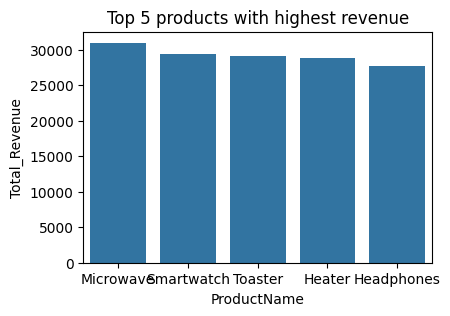

In [179]:
# top 5 products with highest revenue
df = final_data.groupby(['ProductName'])['PurchasePrice'].sum().nlargest(5).reset_index()
plt.figure(figsize=(4.5, 3))
df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
  
sns.barplot(x="ProductName", 
           y="Total_Revenue", 
           data=df).set(title="Top 5 products with highest revenue")

C:\Users\afree\AppData\Local\Temp\ipykernel_33964\3088523508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="ProductName",
C:\Users\afree\AppData\Local\Temp\ipykernel_33964\3088523508.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x="ProductName",


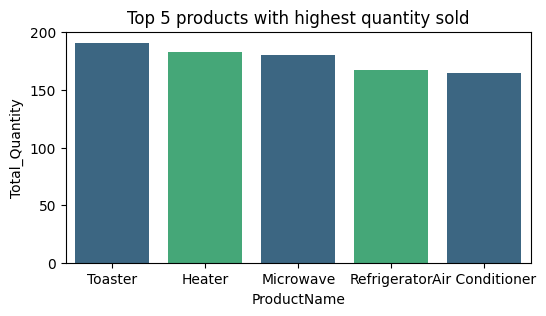

In [183]:
# top 5 products with highest quantity sold
df = final_data.groupby(['ProductName'])['PurchaseQuantity'].sum().nlargest(5).reset_index()
plt.figure(figsize=(6, 3))
df.rename(columns={'PurchaseQuantity':'Total_Quantity'},inplace= True)
  
ax=sns.barplot(x="ProductName", 
           y="Total_Quantity", 
           data=df,palette=colors).set(title="Top 5 products with highest quantity sold")


<Axes: title={'center': 'Top 5 products with highest quantity sold'}, ylabel='CustomerName'>

<Figure size 500x250 with 0 Axes>

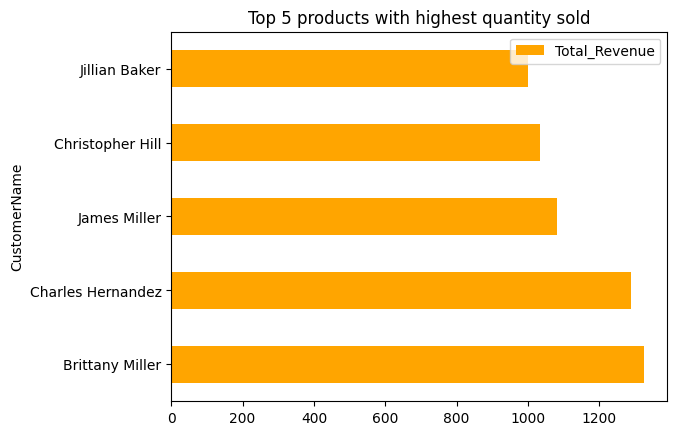

In [191]:
# Top 5 customers based on revenue:
df = final_data.groupby(['CustomerName'])['PurchasePrice'].sum().nlargest(5).reset_index()
plt.figure(figsize=(5, 2.5))
df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
  
df.plot.barh(x='CustomerName',y='Total_Revenue',title="Top 5 products with highest quantity sold",color="orange")

<Axes: title={'center': 'Top 5 countries with highest revenue'}, ylabel='Country'>

<Figure size 300x200 with 0 Axes>

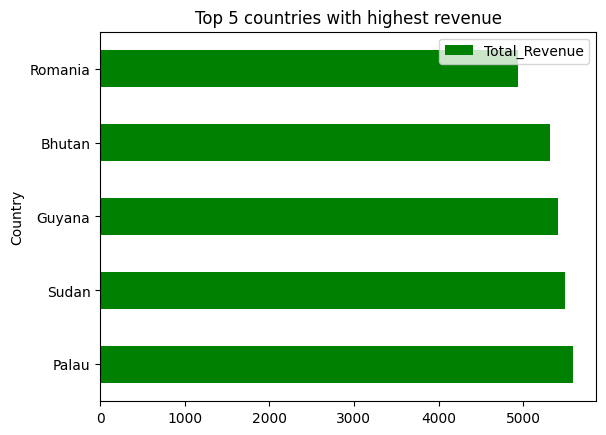

In [194]:
# Top 5 Countries with highest revenue:
df = final_data.groupby(['Country'])['PurchasePrice'].sum().nlargest(5).reset_index()
plt.figure(figsize=(3, 2))
df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
  
df.plot.barh(x='Country',y='Total_Revenue',title="Top 5 countries with highest revenue",color="green")

<Axes: title={'center': 'Top 5 countries with highest quantity sold'}, ylabel='Country'>

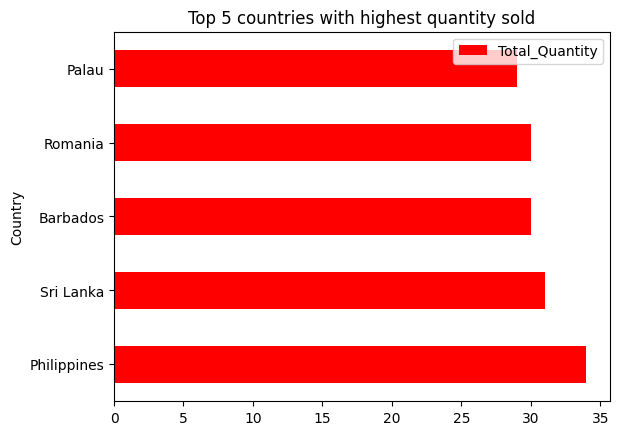

In [197]:
# Top 5 Countries with highest quantity sold:
df = final_data.groupby(['Country'])['PurchaseQuantity'].sum().nlargest(5).reset_index()
df.rename(columns={'PurchaseQuantity':'Total_Quantity'},inplace= True)
  
df.plot.barh(x='Country',y='Total_Quantity',title="Top 5 countries with highest quantity sold",color="red")

[Text(0.5, 1.0, 'Year wise total revenue')]

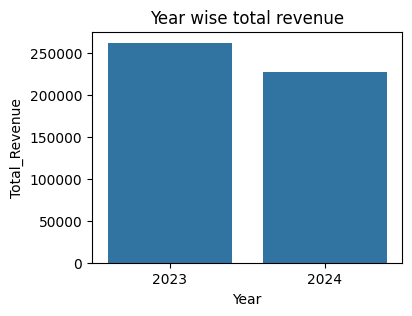

In [202]:
# Year wise total revenue:
df = final_data_copy.groupby(['Year'])['PurchasePrice'].sum().reset_index()
plt.figure(figsize=(4, 3))
df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
  
sns.barplot(x="Year", 
           y="Total_Revenue", 
           data=df).set(title="Year wise total revenue")

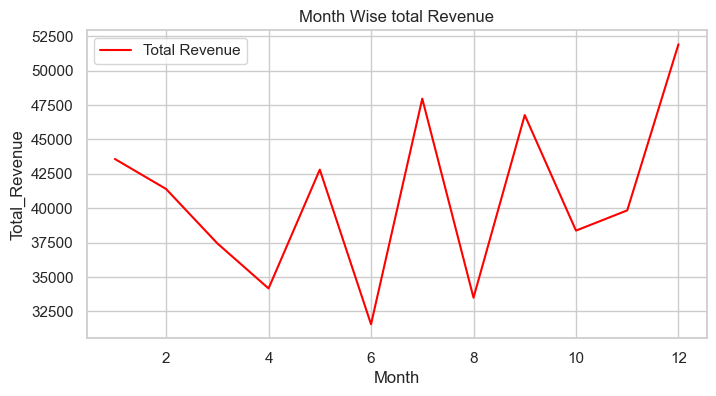

In [207]:
# Month wise Total Revenue:
new_df = final_data.groupby([final_data.PurchaseDate.dt.month ], sort=True)['PurchasePrice'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchasePrice', ascending=False)
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
new_df.rename(columns={'PurchaseDate':'Month'},inplace= True)
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(8, 4))  # Setting the figure size
sns.lineplot(data=new_df, x='Month', y='Total_Revenue', label='Total Revenue', color='red')
 
# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total_Revenue')
plt.title('Month Wise total Revenue')
 
plt.show()

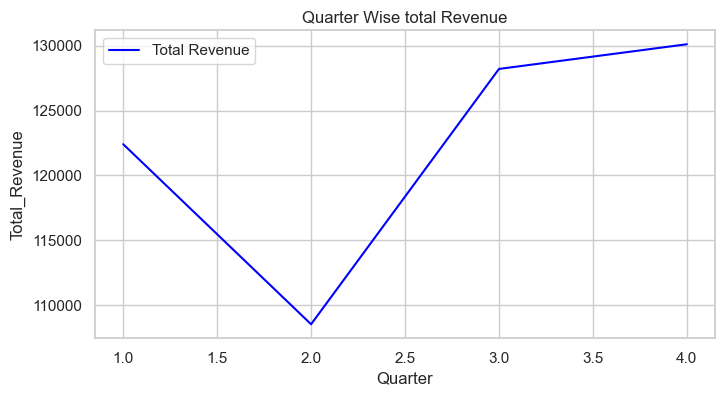

In [208]:
# Quarter wise sales:
new_df = final_data_copy.groupby(["Quarter" ], sort=True)['PurchasePrice'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchasePrice', ascending=False)
new_df.rename(columns={'PurchasePrice':'Total_Revenue'},inplace= True)
new_df.rename(columns={'PurchaseDate':'Quarter'},inplace= True)
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(8, 4))  # Setting the figure size
sns.lineplot(data=new_df, x='Quarter', y='Total_Revenue', label='Total Revenue', color='blue')
 
# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Total_Revenue')
plt.title('Quarter Wise total Revenue')
 
plt.show()

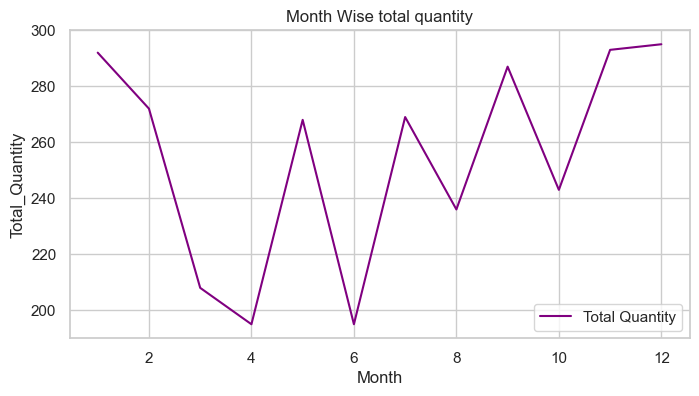

In [214]:
# Month wise Total Quantity:
new_df = final_data.groupby([final_data.PurchaseDate.dt.month ], sort=True)['PurchaseQuantity'].sum().reset_index()
new_df = new_df.sort_values(by = 'PurchaseQuantity', ascending=False)
new_df.rename(columns={'PurchaseQuantity':'Total_Quantity'},inplace= True)
new_df.rename(columns={'PurchaseDate':'Month'},inplace= True)
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
plt.figure(figsize=(8, 4))  # Setting the figure size
sns.lineplot(data=new_df, x='Month', y='Total_Quantity', label='Total Quantity', color='purple')
 
# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total_Quantity')
plt.title('Month Wise total quantity')
 
plt.show()

[Text(0.5, 1.0, 'Year wise category wise revenue')]

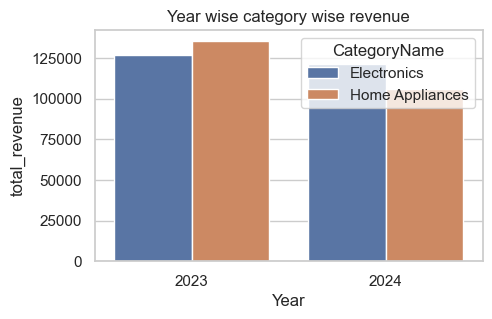

In [216]:
# Year wise category wise revenue
df=final_data_copy.groupby(['Year','CategoryName']).agg(total_revenue=("PurchasePrice","sum"))
df=df.reset_index()
plt.figure(figsize=(5, 3)) 
sns.barplot(x='Year',y="total_revenue",hue='CategoryName',data=df).set(title="Year wise category wise revenue")

In [218]:
# Year wise category wise sales
df = (final_data_copy
      .groupby(["Year","CategoryName"])["PurchasePrice"]
      .sum()
      .unstack())
df

CategoryName,Electronics,Home Appliances
Year,,
2023,127073.90,135272.17
2024,121120.66,105807.99


(array([0, 1]), [Text(0, 0, '2023'), Text(1, 0, '2024')])

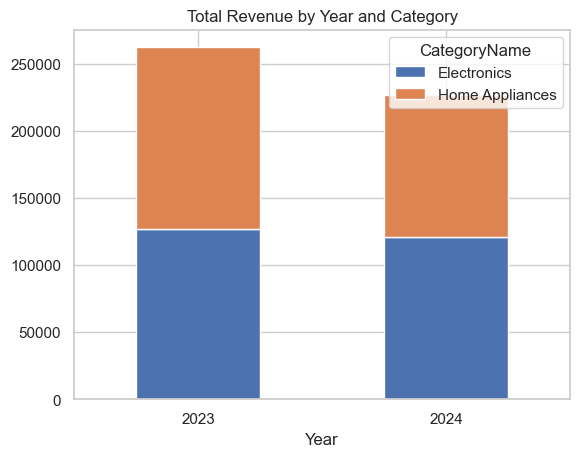

In [225]:
df.plot(kind='bar', stacked=True)
# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Total Revenue by Year and Category')
plt.xticks(rotation=0, ha='center')

# Report:

#### 1. Period of data-
The data is for the years 2023 and 2024.
#### 2. How many transactions?
There are 1000 transactions in the Dataset
#### 4. How many total products are sold?
The total number of products sole are 3053.
#### 5. How many categories are there and what is the revenue for each category?
There are 2 categories , Electronics and Home Appliances. The revenue from Home Appliances is 241,080.16 dollars and the revenue from Electronics is 248,194.56 dollars. Electronics category has slightly more revenue as compared to Home appliances.
#### 6. Category wise total quantity-
1573 products from Home Appliance Category are sold and 1480 products from Electronics Category are sold.
#### 7.Product with the highest revenue-
Microwave is the product with the highest revenue. The revenue for it is $30,970.75 

#### 8.Product with the most quantity sold-
191 Toasters were sold , making it the highest sold product.
#### 9. The top 10 customers in terms of purchase value (revenue)-
The top 10 Customers are- Brittany Miller ,Charles Hernandez,James Miller,Jillian Baker,Christopher Hill ,Patricia Taylor,Mikayla Rios ,Matthew Espinoza ,Jamie Montoya , and,Charles Clark  . (In the SQL database we have assumed that one customer can make 2 transactions)
#### 10. The top 5 countries with the highest revenue-
They are Palau,Sudan, Guyana, Bhutan, and Romania
#### 11. The top 5 countries in terms of total quantity purchased-
They are Philippines,Sri Lanka, Barbados,Romania, Palau.
#### 12. Year wise percentage of Customers-
In the dataset 54.3% Customers do the transaction in 2023 and 45.7% do it in 2024.
#### 13. Revenue growth year wise-
The revenue in year 2023 is 262,346.07 dollars and in the year 2024 is 226,928.65 dollars. There is a 13.5% fall in revenue from 2023 in 2024
#### 14. Month wise revenue-
In the data given, the month of december has the highest revenue across 2 years at $51,910.42


#### 15. Quarter wise revenue-
Across the 2 years, Quarter 4 has the highest revenue at $130,118.68.


#### 16. Spike and fall in revenue-
The highest rise in revenue is seen from 2023 June to 2023 July where the spike is from  4012.44 dollars to 47,956.69 dollars. The highest fall in revenue is seen from 2024 May to 2024 June where the fall is from 42,799.97 dollars to 27,551.47 dollars (35.6 percent fall).
#### 17. Year wise month wise revenue-
The highest revenue over all and for 2023 is seen in december of 2023, at %51,910.42. The highest revenue for 2024 is seen in the month of January at 43,575.14 dollars.


#### 18. Year Wise quarter wise revenue-
In 2023, the highest revenue is seen in quarter 4 at 130,118.68 dollars. In 2024, the highest revenue is seen in Quarter 1, at 122,411.57 dollars . The highest quarter wise growth is seen from quarter 2 of 2023 to quarter 3 of 2023, a spike from 4012.44 dollars to 128,214.95 dollars. The highest quarter wise fall is seen from quarter 1 of 2024 to quarter 2 of 2024, fall from 122,411.57 dollars to 104,517.08 dollars (14% fall)	

#### 19. Year wise total quantity-
1651 products were sold in year 2023. 
#### 20. Year wise month wise total quantity-
The highest quantity of products was sold in December of 2023 at 295